In [1]:
!pip install keras-tuner

In [2]:
pip install --upgrade pip setuptools wheel


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install matplotlib opencv-python

In [5]:
!pip list

Package                           Version
--------------------------------- ------------------
absl-py                           2.1.0
aext-assistant                    4.0.15
aext-assistant-server             4.0.15
aext-core                         4.0.15
aext-core-server                  4.0.15
aext-panels                       4.0.15
aext-panels-server                4.0.15
aext-share-notebook               4.0.15
aext-share-notebook-server        4.0.15
aext-shared                       4.0.15
aiobotocore                       2.12.3
aiohttp                           3.9.5
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
altair                            5.0.1
anaconda-anon-usage               0.4.4
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.5.1
anaconda-navigator                2.6.0
anaconda-project                  0.11.1
annotated-ty

In [6]:
import tensorflow as tf
import os

In [7]:
!pip install tensorflow-macos


In [8]:
!pip list

Package                           Version
--------------------------------- ------------------
absl-py                           2.1.0
aext-assistant                    4.0.15
aext-assistant-server             4.0.15
aext-core                         4.0.15
aext-core-server                  4.0.15
aext-panels                       4.0.15
aext-panels-server                4.0.15
aext-share-notebook               4.0.15
aext-share-notebook-server        4.0.15
aext-shared                       4.0.15
aiobotocore                       2.12.3
aiohttp                           3.9.5
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
altair                            5.0.1
anaconda-anon-usage               0.4.4
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.5.1
anaconda-navigator                2.6.0
anaconda-project                  0.11.1
annotated-ty

## Data loading

In [9]:
import cv2
# import imghdr
!pip install pillow
from PIL import Image

In [10]:
data_dir='data'

In [11]:
image_exts=['jpeg','jpg','png','bmp']

In [12]:
os.listdir(os.path.join(data_dir,'happy'))

['images26.jpg',
 'images32.jpg',
 'e162ccda8ce0f197f8863f327add9233.jpg',
 '05-12-21-happy-people.jpg',
 'image22.jpeg',
 'GettyImages-871518740-1024x707.jpg',
 '7-principles-of-successful-and-happy-people.png',
 'how-happy-are-healthy-people.jpg',
 'physed-happiness-facebookJumbo.jpg',
 '170404-happy-workers-feature.jpg',
 'images33.jpg',
 'images27.jpg',
 'image18.jpeg',
 'MV5BMTM3ODM0NTQ1MF5BMl5BanBnXkFtZTcwMzAxMTM5OA._V1_.jpg',
 'images31.jpg',
 'images25.jpg',
 'Happy-people-raise-happy-kids-raise-yourself-first.jpg',
 'images19.jpg',
 'habits-that-define-very-happy-people.jpg',
 'goup-happy-people-group-jumping-isolated-white-background-35582232.jpg',
 '1902587.jpg',
 'o-HAPPY-facebook.jpg',
 '07-120104-happy_people_are_not_nice_people.jpg',
 'happy-people-13772392.jpg',
 'images18.jpg',
 'images24.jpg',
 'images30.jpg',
 'image14.jpeg',
 'image15.jpeg',
 'young-and-happy-people-vector-15114154.jpg',
 'images34.jpg',
 'maxresdefault2.jpg',
 'images20.jpg',
 'bigstock-Portrait-Of

In [26]:
img=cv2.imread(os.path.join('data','happy','154006829.jpg'))
img.shape

(3744, 5616, 3)

In [24]:
from matplotlib import pyplot as plt

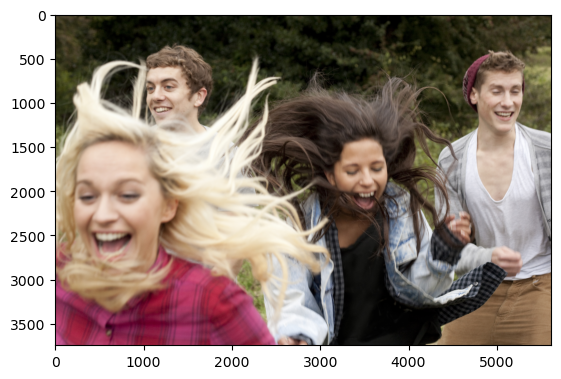

In [34]:
plt.imshow(img) #This is because it has a default coding of bgr
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

## Removing doggy images

In [18]:
for image_class in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, image_class)
    if not os.path.isdir(class_dir):
        continue
    for image in os.listdir(class_dir):
        image_path=os.path.join(data_dir,image_class,image)
        if not os.path.isfile(image_path):
            continue
        try:
            img=cv2.imread(image_path)
            tip=Image.open(image_path).format.lower()
            if tip not in image_exts:
                print('Image not in exts list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            print(f'Error: {e}') 

In [38]:
tf.data.Dataset.list_files

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [40]:
import numpy as np
from matplotlib import pyplot as plt

In [44]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)
Source:   
@keras_export(
    [
        "keras.utils.image_dataset_from_directory",
        "keras.preprocessing.image_dataset_from_directory",
    ]
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    ve

In [46]:
data = tf.keras.utils.image_dataset_from_directory(
    'data',
    labels='inferred',
    label_mode='int',
    image_size=(256, 256),
    batch_size=32,
    verbose=1  # Set to 1 to enable detailed logging
)


Found 305 files belonging to 2 classes.


## Iterating and batching data

In [50]:
data_iterator=data.as_numpy_iterator()  #for iterating in the data so as to access the daata

In [72]:
#For getting batch from the data
batch=data_iterator.next()

In [54]:
batch

(array([[[[248.       , 227.       , 172.       ],
          [248.       , 227.       , 172.       ],
          [248.       , 227.       , 172.       ],
          ...,
          [251.       , 232.       , 189.       ],
          [251.       , 232.       , 189.       ],
          [251.       , 232.       , 189.       ]],
 
         [[248.       , 227.       , 172.       ],
          [248.       , 227.       , 172.       ],
          [248.       , 227.       , 172.       ],
          ...,
          [251.       , 232.       , 189.       ],
          [251.       , 232.       , 189.       ],
          [251.       , 232.       , 189.       ]],
 
         [[248.       , 227.       , 172.       ],
          [248.       , 227.       , 172.       ],
          [248.       , 227.       , 172.       ],
          ...,
          [251.       , 232.       , 189.       ],
          [251.       , 232.       , 189.       ],
          [251.       , 232.       , 189.       ]],
 
         ...,
 
         [[2

In [56]:
 len(batch)

2

In [76]:
#Class 0 is for happy
#Class 1 is for sad
batch[0].shape #Images represented as numpy arrays

(32, 256, 256, 3)

In [62]:
batch[1]

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1], dtype=int32)

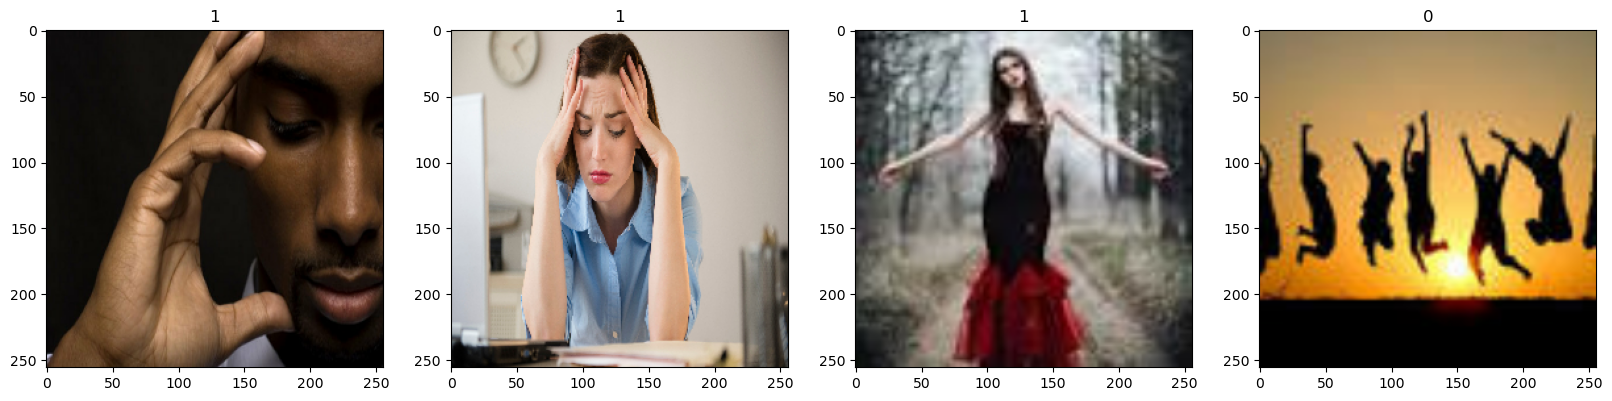

In [74]:

fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Processing of data

In [82]:
#Scaling data
data=data.map(lambda x,y:(x/255,y))

In [90]:
scaled_iterator=data.as_numpy_iterator()
batch=scaled_iterator.next()

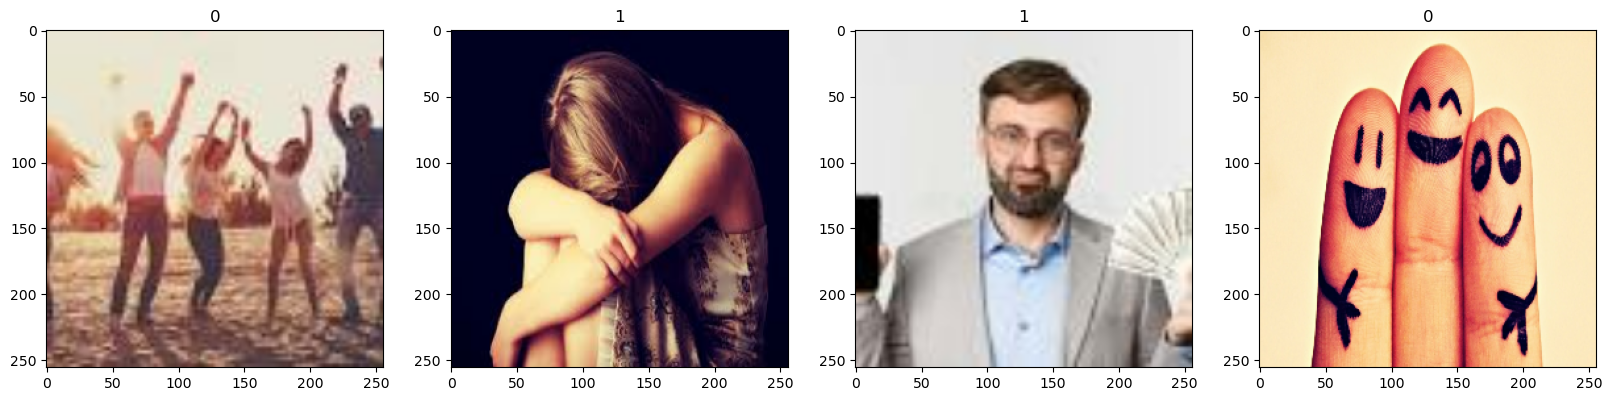

In [94]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(float))
    ax[idx].title.set_text(batch[1][idx])

In [98]:
batch[0].min()

0.0

### Spliting Data

In [113]:
len(data)

10

In [121]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)
test_size=int(len(data)*.1)


In [125]:
test_size+train_size+val_size

10

In [127]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [129]:
len(val)

2

## Model Building

In [306]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,BatchNormalization
from tensorflow.keras.regularizers import l2

In [348]:
model=Sequential()

In [350]:
#1->is a stride(moving of filter is 1px)
#3,3->filter size
#16->number of filter
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())#MaxPooling is for taking max value for each iteration

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())#flatten is for 

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
#as dense layer is the output layer so it has a sigmoid funtion to classify sad or happy

In [352]:
model.compile('adam',loss='binary_crossentropy',metrics=['accuracy'])

In [354]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [356]:
logdir='logs'

In [358]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [360]:
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 309ms/step - accuracy: 0.4849 - loss: 2.6569 - val_accuracy: 0.4688 - val_loss: 0.6739
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 260ms/step - accuracy: 0.4715 - loss: 0.7005 - val_accuracy: 0.6250 - val_loss: 0.6761
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 280ms/step - accuracy: 0.5793 - loss: 0.6761 - val_accuracy: 0.5156 - val_loss: 0.6708
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 273ms/step - accuracy: 0.5896 - loss: 0.6514 - val_accuracy: 0.7656 - val_loss: 0.6416
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 278ms/step - accuracy: 0.7435 - loss: 0.6385 - val_accuracy: 0.6406 - val_loss: 0.6183
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 263ms/step - accuracy: 0.7305 - loss: 0.6002 - val_accuracy: 0.6719 - val_loss: 0.6017
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 316ms/step - accuracy: 0.7903 - loss: 0.5421 - val_accuracy: 0.7969 - val_loss: 0.4884
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 285ms/step - accuracy: 0.7780 - loss: 0.4881 - val_accuracy: 0.7656 - val_loss:

### Plot Performance

In [362]:
hist.history

{'accuracy': [0.5089285969734192,
  0.5625,
  0.5758928656578064,
  0.5669642686843872,
  0.7098214030265808,
  0.7723214030265808,
  0.8125,
  0.7723214030265808,
  0.7991071343421936,
  0.8214285969734192,
  0.7767857313156128,
  0.8660714030265808,
  0.9017857313156128,
  0.9107142686843872,
  0.9375,
  0.9464285969734192,
  0.9553571343421936,
  0.9732142686843872,
  0.9821428656578064,
  0.9910714030265808],
 'loss': [2.0597143173217773,
  0.6902166604995728,
  0.6724969744682312,
  0.6564525365829468,
  0.6331644654273987,
  0.5898140668869019,
  0.516860842704773,
  0.48527011275291443,
  0.4306243360042572,
  0.44354113936424255,
  0.41490110754966736,
  0.33297595381736755,
  0.3144950270652771,
  0.27978867292404175,
  0.2285270392894745,
  0.1974777728319168,
  0.1510038822889328,
  0.117311991751194,
  0.08279722183942795,
  0.059403564780950546],
 'val_accuracy': [0.46875,
  0.625,
  0.515625,
  0.765625,
  0.640625,
  0.671875,
  0.796875,
  0.765625,
  0.765625,
  0.7187

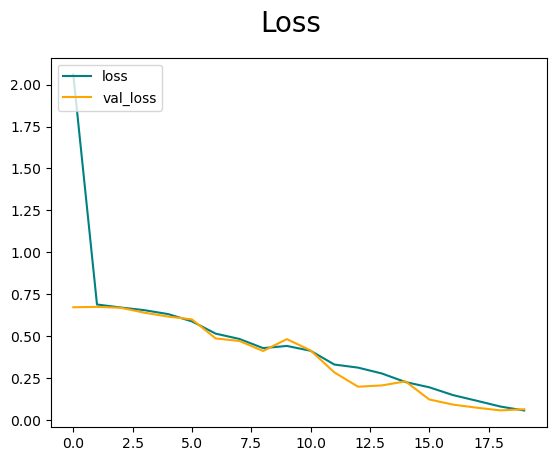

In [364]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()


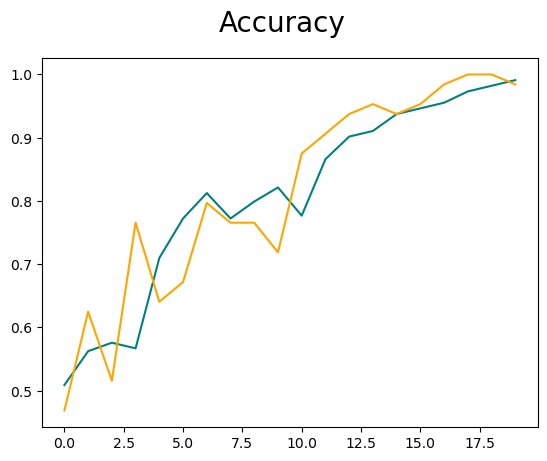

In [366]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
plt.suptitle('Accuracy',fontsize=20)
plt.show()


### Evaluate Performance

In [368]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [370]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [372]:
for batch in test.as_numpy_iterator():
    X,y=batch
    yhat=model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


2024-07-30 19:16:33.662344: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [374]:
print(pre.result().numpy(),re.result().numpy(),acc.result().numpy())

1.0 1.0 1.0


### Test

In [401]:
import cv2

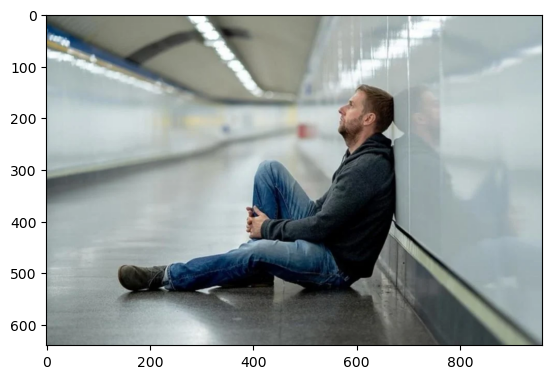

In [430]:
img=cv2.imread('sad.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

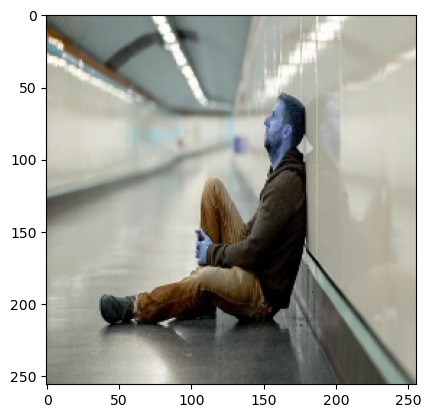

In [431]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [434]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [436]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


In [438]:
yhat

array([[0.9151845]], dtype=float32)

In [440]:
if yhat>0.5:
    print('Predicted class is Sad!')
else:
    print('Predicted class is Happy!')

Predicted class is Sad!


## Save the model

In [443]:
from tensorflow.keras.models import load_model

In [445]:
model.save(os.path.join('models','EmotionClassification.h5'))

In [447]:
new_model=load_model(os.path.join('models','EmotionClassification.h5'))

In [449]:
new_model

<Sequential name=sequential_8, built=True>

In [451]:
new_model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


array([[0.9151845]], dtype=float32)